# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree
from sklearn import metrics
from scipy.spatial import Voronoi, voronoi_plot_2d
import joblib

import warnings
warnings.filterwarnings("ignore")

# Loading the dataset

In [4]:
df = pd.read_csv("Customer Data.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# EDA

In [6]:
df.shape

(8950, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [9]:
#checking which columns contain null values
(df.isnull().sum()[df.isnull().sum()>0]*100)/len(df)

CREDIT_LIMIT        0.011173
MINIMUM_PAYMENTS    3.497207
dtype: float64

In [10]:
# filling mean value in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [11]:
df.isnull().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [12]:
# checking for duplicate rows in the dataset
df.duplicated().sum()

0

In [13]:
# drop CUST_ID column because it is not used
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [14]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [15]:
len(df.columns)

17

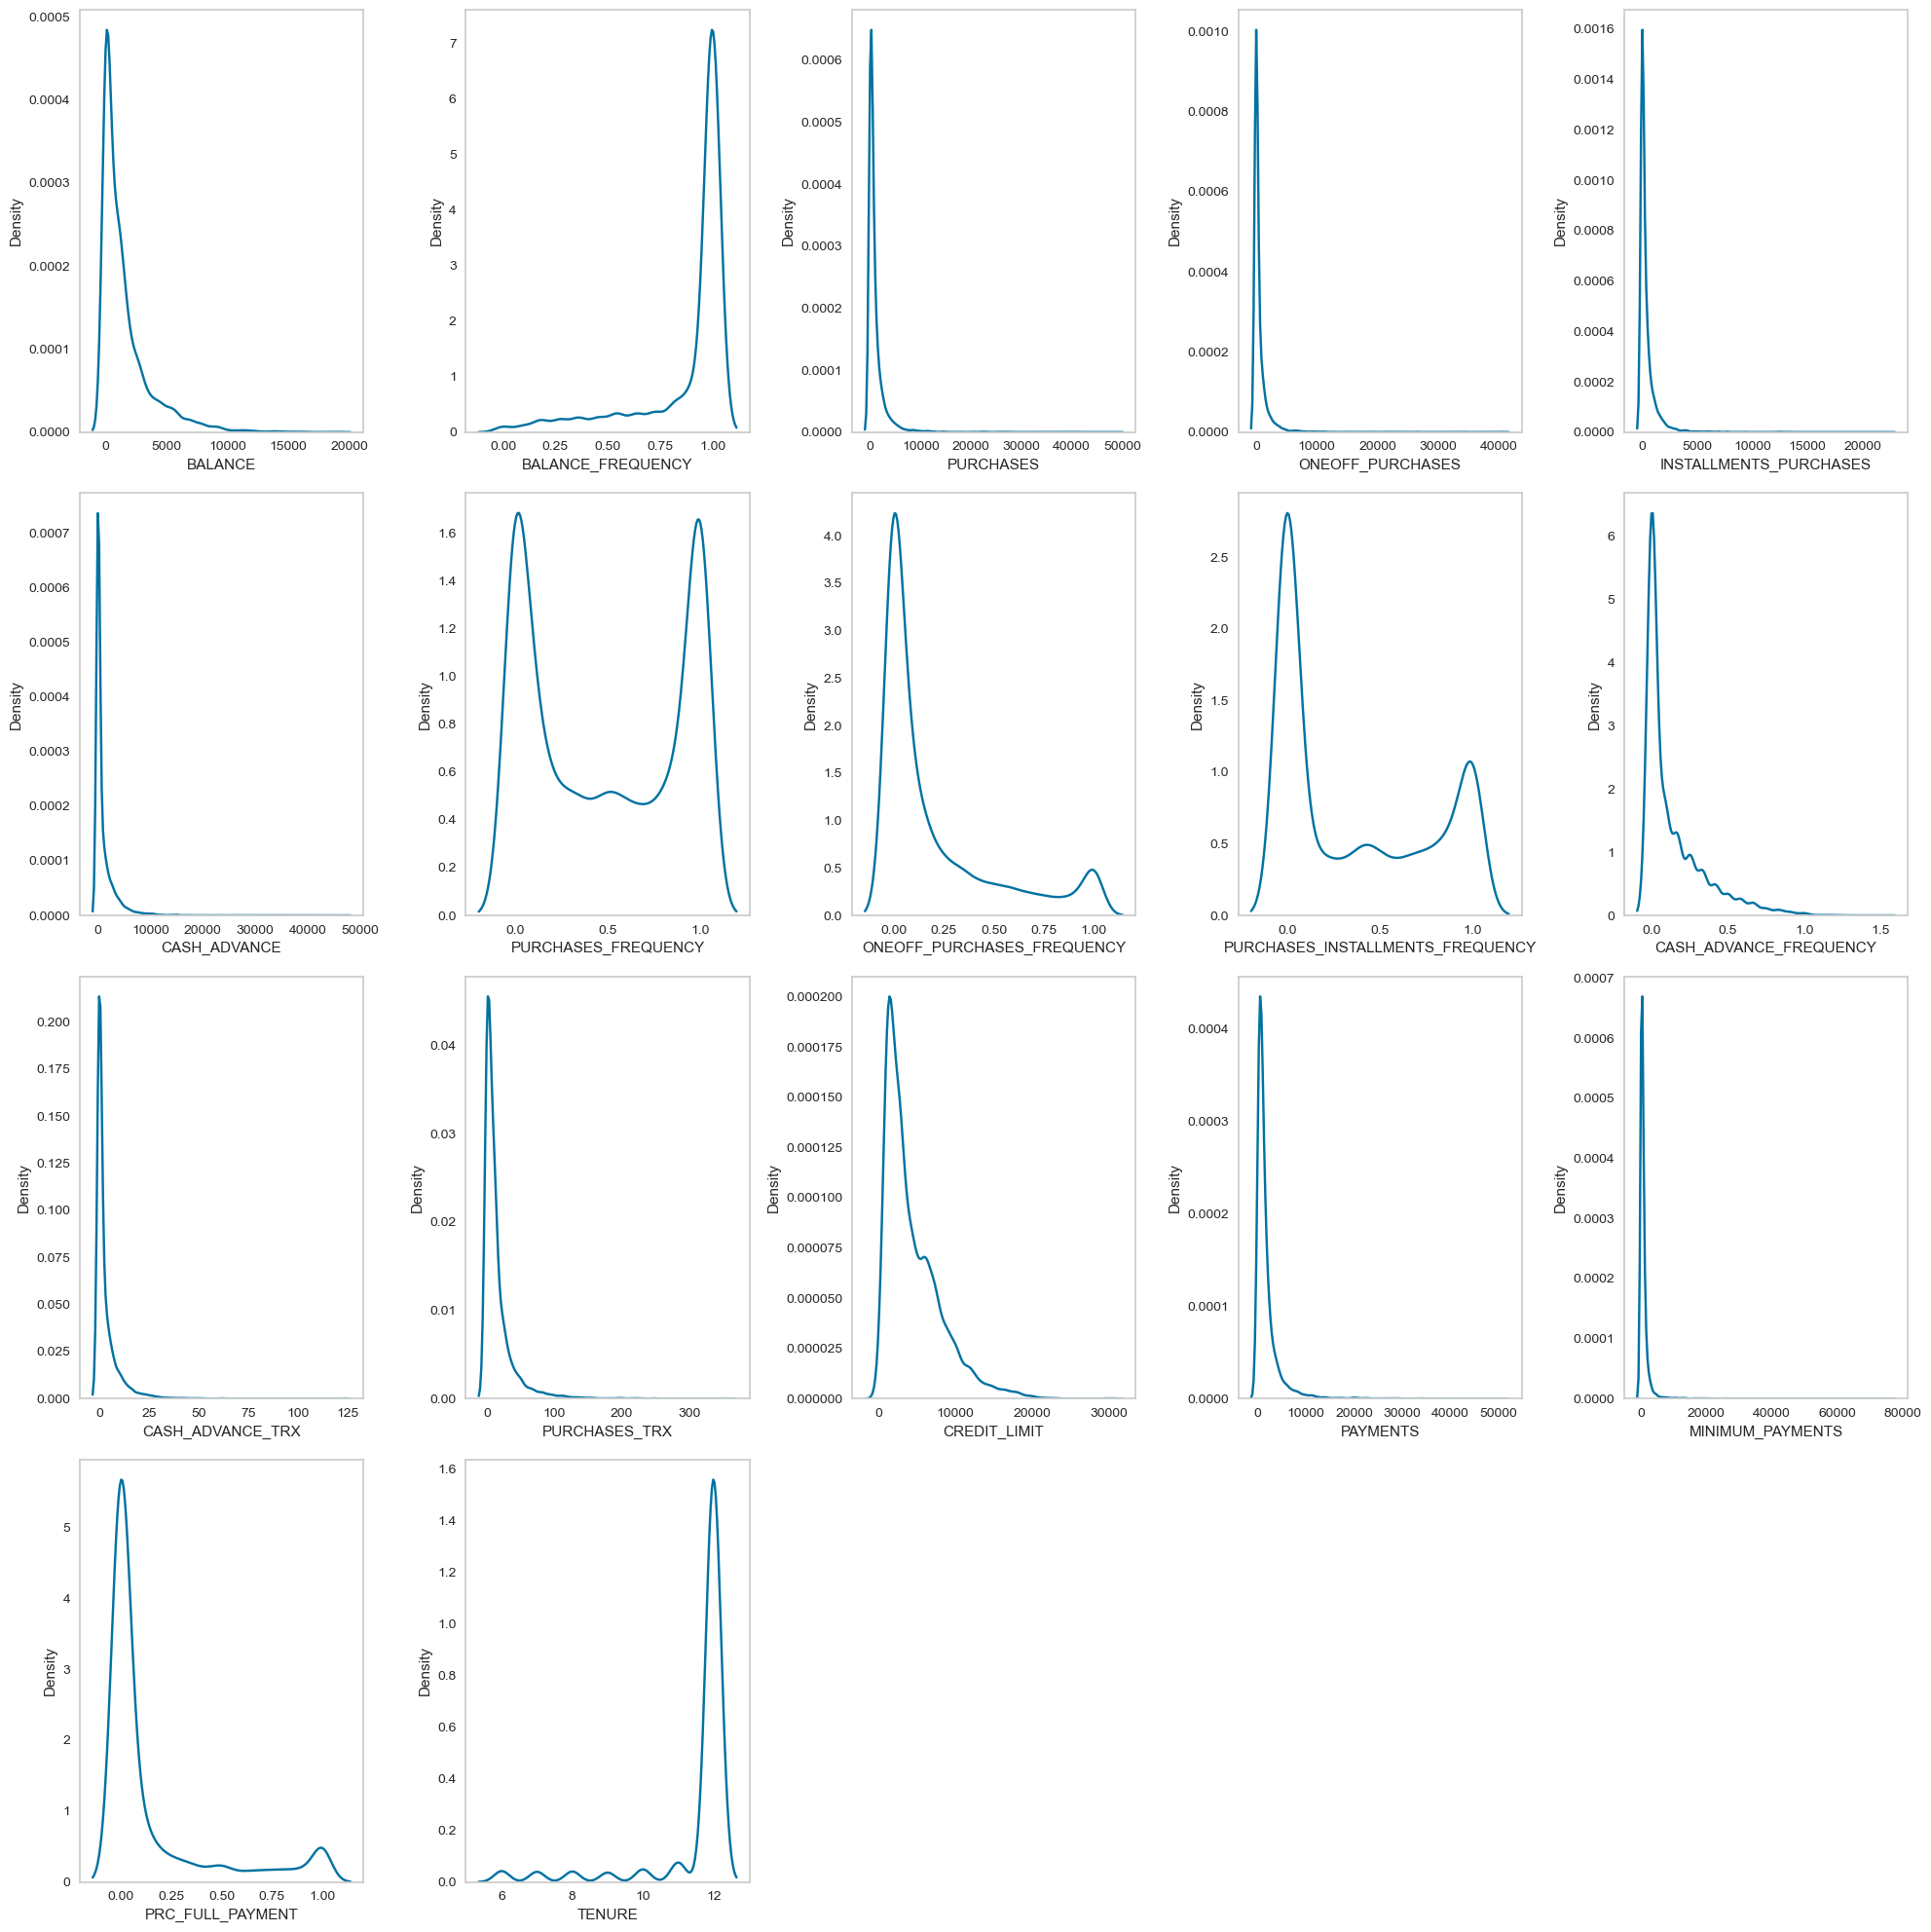

In [16]:
x = 1
plt.figure(figsize=(20,20))  # Create one figure with a larger size

for i in df.columns:
    if df[i].dtype != 'object':
        plt.subplot(4, 5, x)  # Create subplots within the single figure
        sns.kdeplot(df[i])
        plt.grid()
        x += 1

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

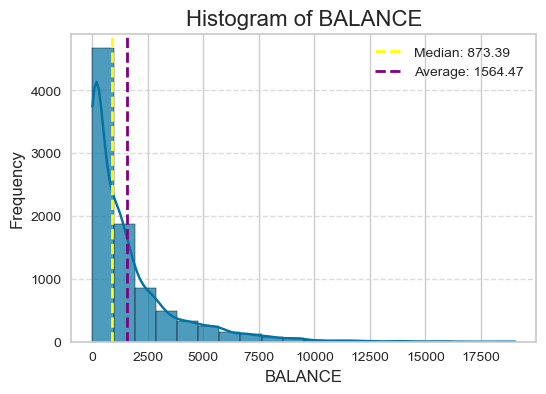

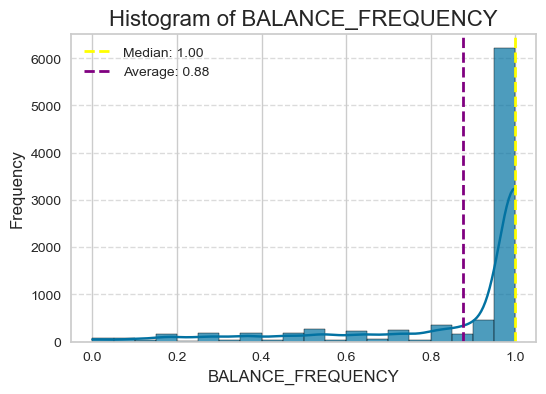

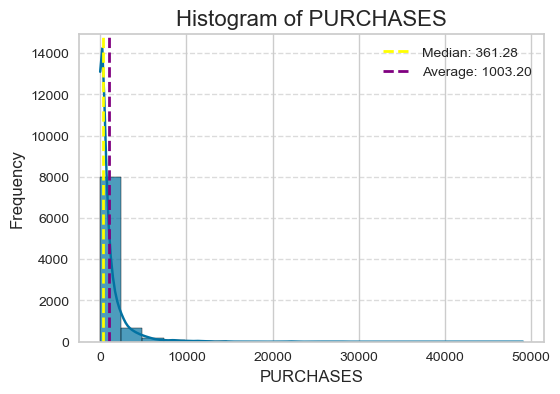

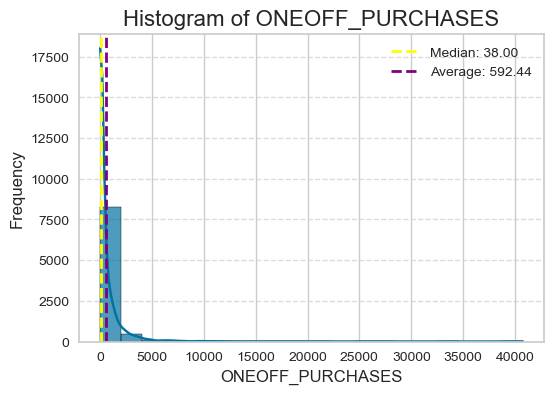

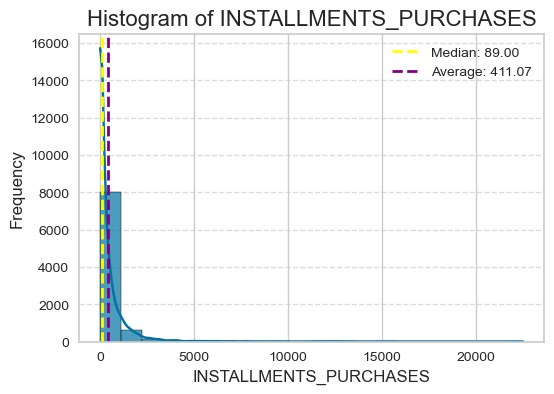

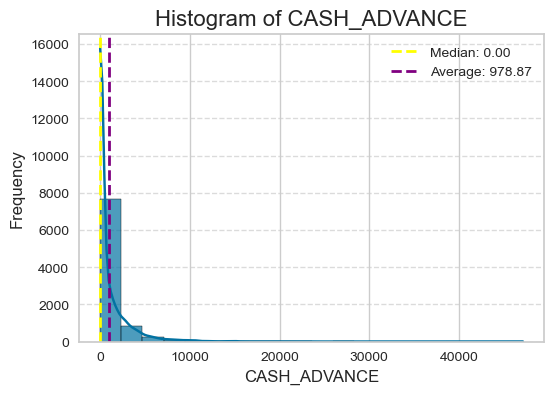

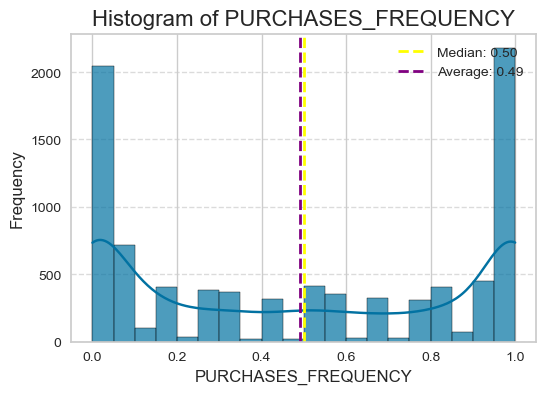

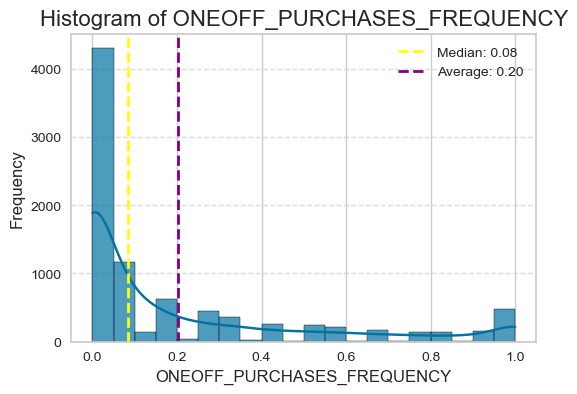

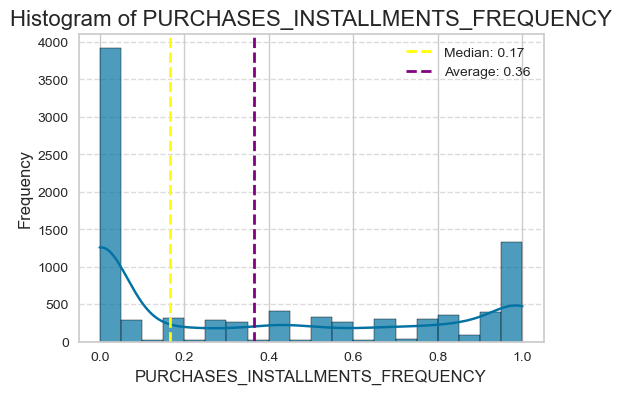

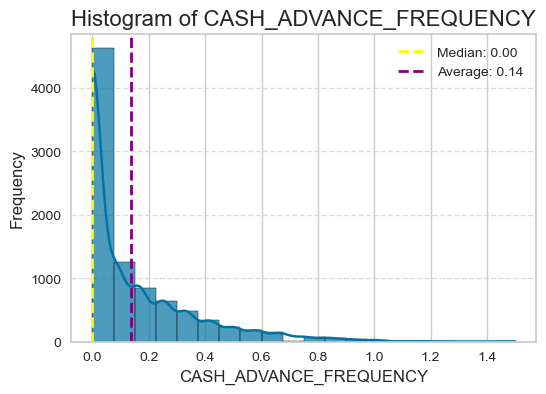

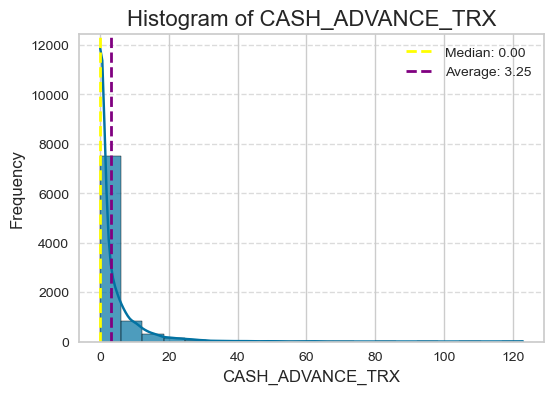

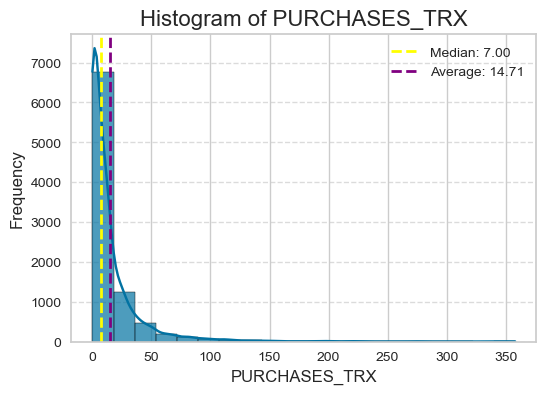

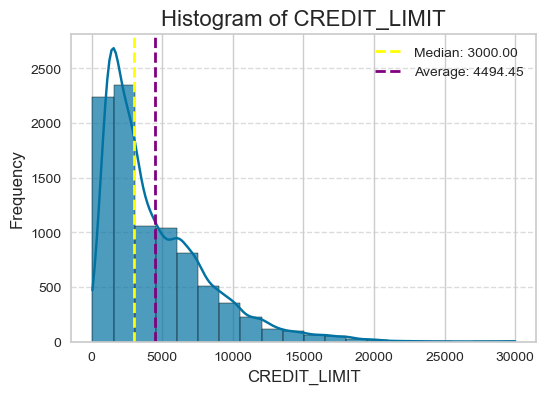

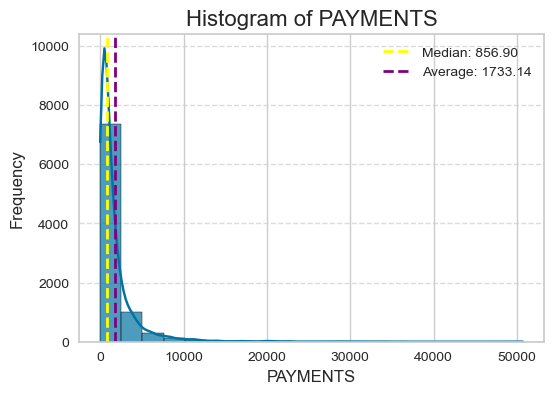

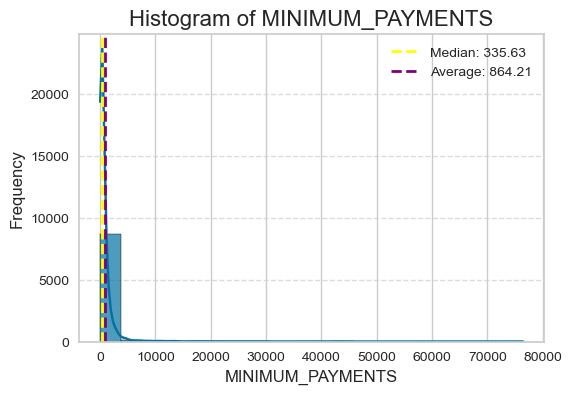

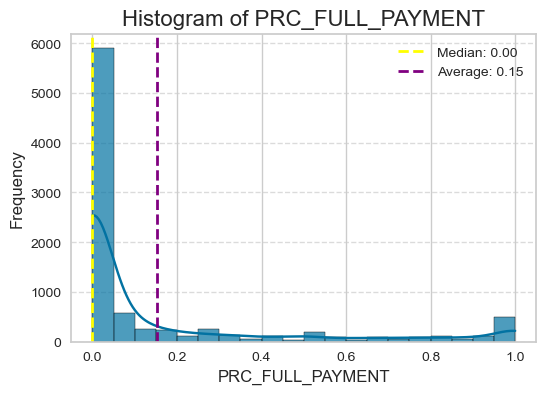

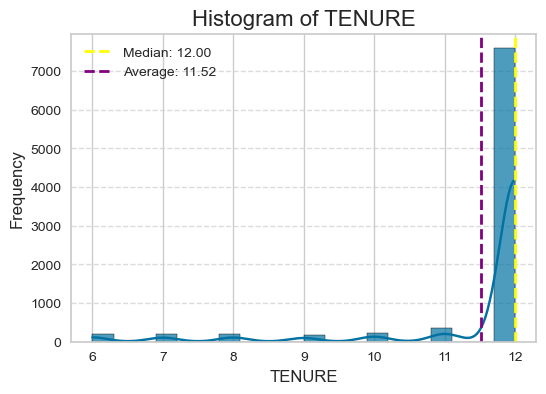

In [17]:
for i, column in enumerate(df.columns):
    plt.figure(figsize=(6, 4))
    sns.histplot(df[column], bins=20, kde=True, edgecolor='black', alpha=0.7)
    median_value = df[column].median()
    average_value = df[column].mean()
    
    plt.axvline(median_value, color='yellow', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
    plt.axvline(average_value, color='purple', linestyle='dashed', linewidth=2, label=f'Average: {average_value:.2f}')
    
    plt.title(f'Histogram of {column}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

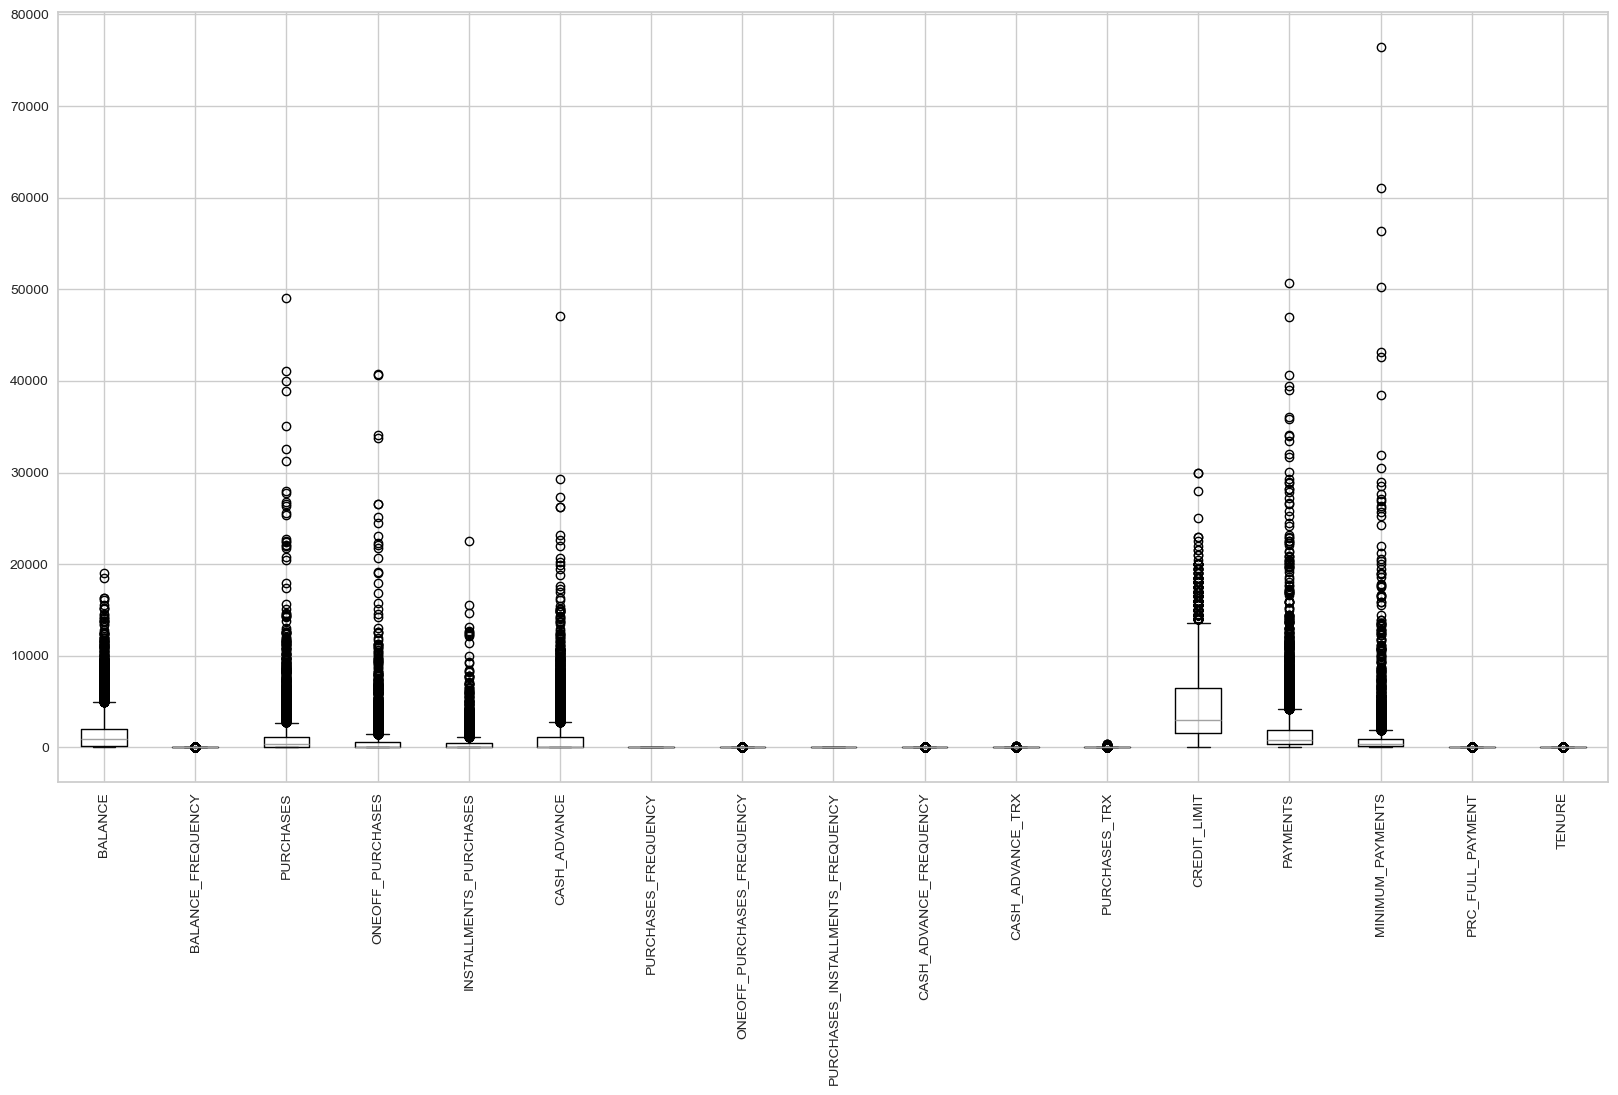

In [18]:
df.boxplot(figsize=(20,10))
plt.xticks(rotation=90)
plt.show()

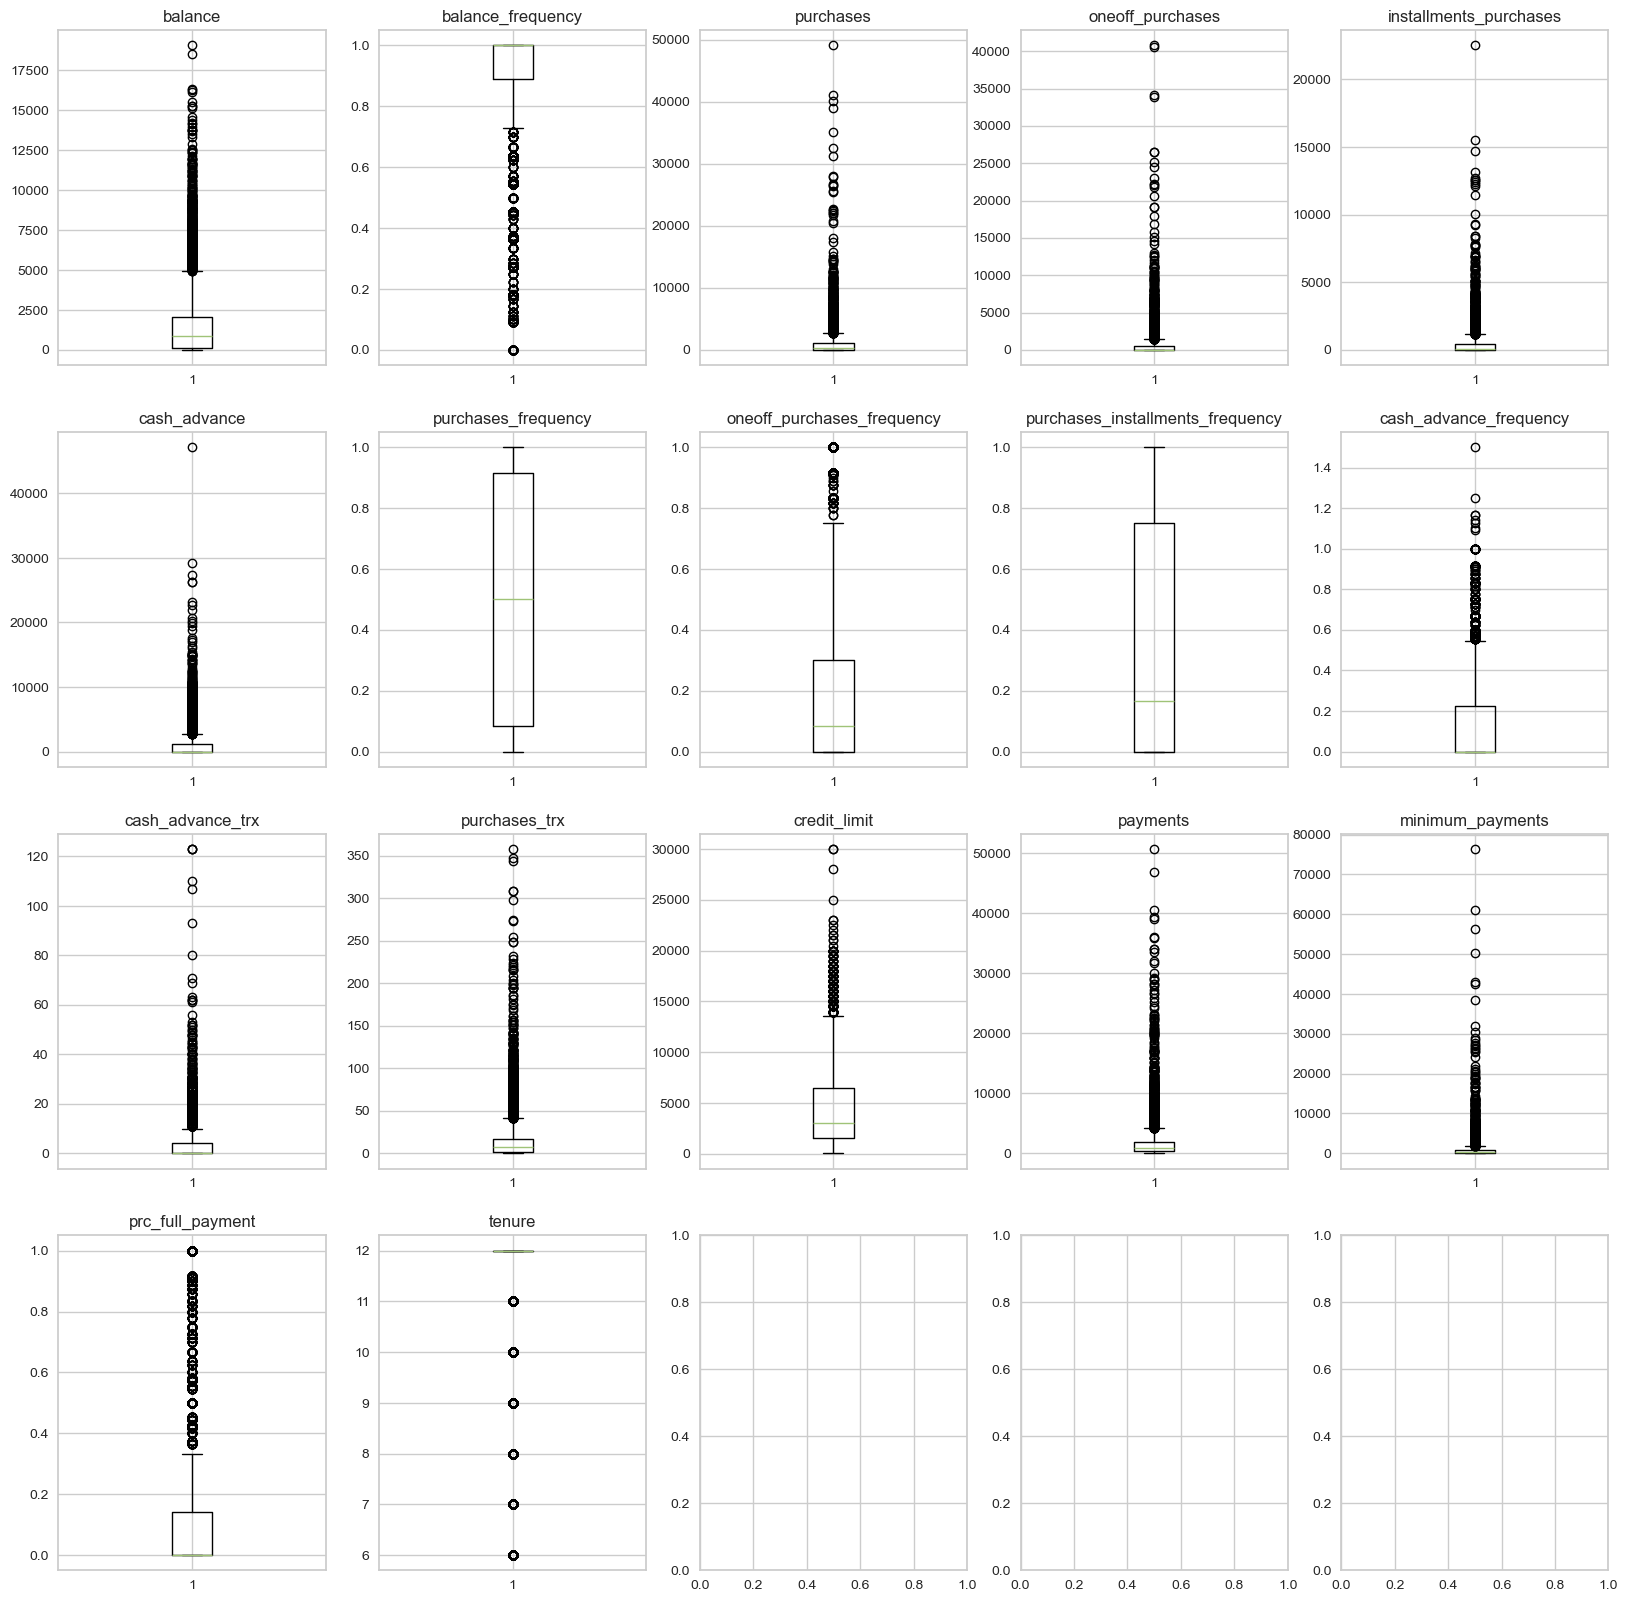

In [19]:
# Create a grid of subplots
fig, axes = plt.subplots(4, 5, figsize=(20,20))  # Adjust figsize as needed
axes = axes.ravel()  # Flatten the array of axes

for i, column in enumerate(df.columns):
    axes[i].boxplot(df[column])
    axes[i].set_title(f"{column.lower()}")

plt.show()

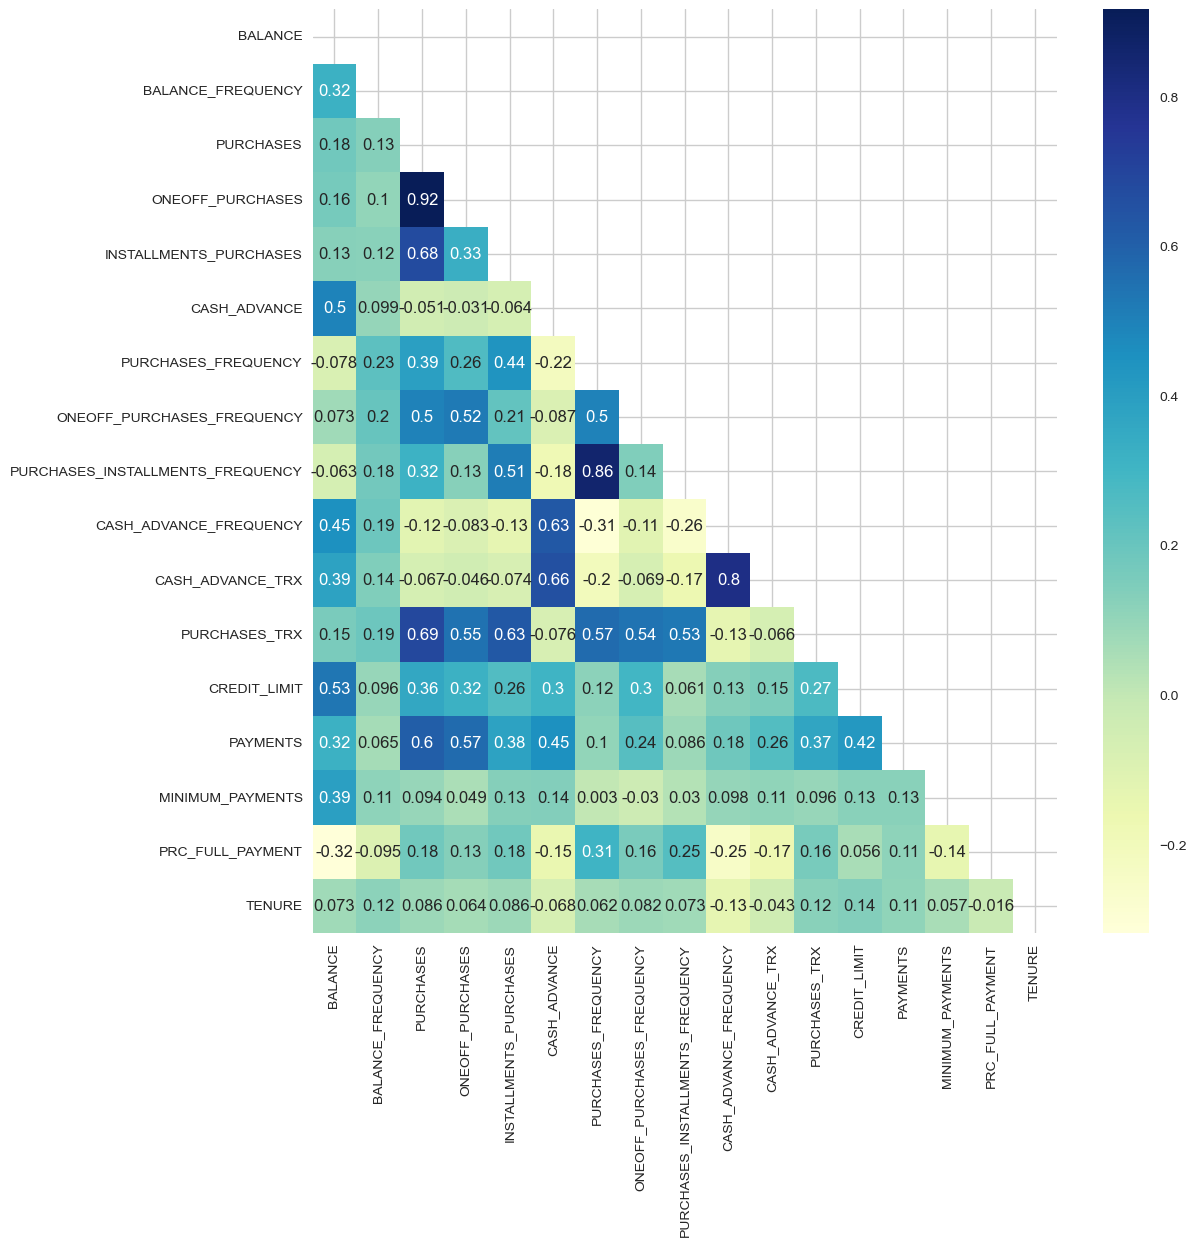

In [20]:
# Calculate the correlation matrix
corr = df.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Plotting the heatmap
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", mask=mask)
plt.show()

# Scaling the DataFrame

In [22]:
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

# Dimensionality reduction
Converting the DataFrame into 2D DataFrame for visualization

In [24]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682220,-1.076453
1,-1.138289,2.506449
2,0.969676,-0.383488
3,-0.873628,0.043164
4,-1.599434,-0.688582
...,...,...
8945,-0.359631,-2.016140
8946,-0.564373,-1.639110
8947,-0.926205,-1.810780
8948,-2.336550,-0.657971


# Hyperparameter tuning
## Finding 'k' value by Elbow Method

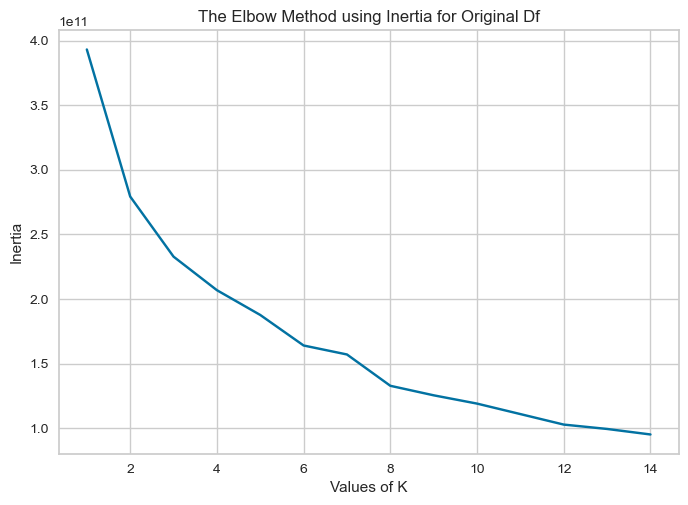

In [26]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia for Original Df') 
plt.show()

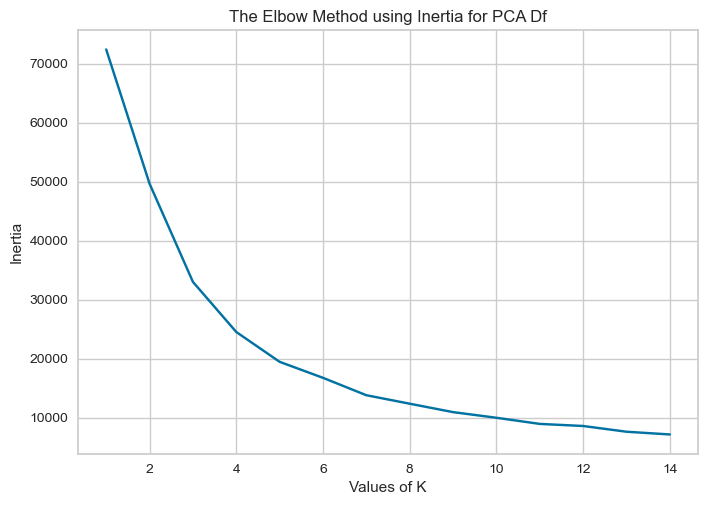

In [27]:
inertia = []
range_val = range(1,15)
for i in range_val:
    kmean = KMeans(n_clusters=i)
    kmean.fit_predict(pd.DataFrame(pca_df))
    inertia.append(kmean.inertia_)
plt.plot(range_val,inertia,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia for PCA Df') 
plt.show()

for the original data and PCA reduced data both, we see an elbow around k=7 suggesting 7 would be a good cluster count for K-means.

## optimal number of principal components

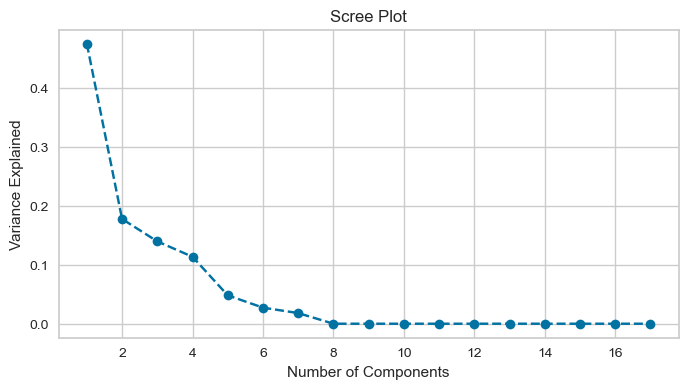

In [30]:
variance_model = PCA(n_components=df.shape[1]).fit(df)

# Variance explained by each component
variance = variance_model.explained_variance_ratio_

# Create a scree plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(variance) + 1), variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.show()

looking at the above scree plot we a see a clear elbow on d=2.

# Model Building using KMeans

#### Splitting the data into train and test sets

In [34]:
pca = PCA(n_components=2).fit(df.to_numpy())
pca_data = pca.transform(df.to_numpy())

In [35]:
KMeansModel = KMeans(n_clusters=7, init='k-means++', random_state=42)
KMeansModel.fit_predict(pca_data)

array([4, 6, 6, ..., 4, 4, 4])

In [36]:
# Convert KMeansModel.labels_ to a pandas Series
clusters = KMeansModel.labels_

labels_series = pd.DataFrame(clusters)
labels_series.rename(columns={0:'clusters'}, inplace=True)

# Concatenate the PCA data with the cluster labels
pca_data = pd.DataFrame(pca_data)
pca_df_kmeans = pd.concat([pca_data, labels_series], axis=1)
pca_df_kmeans.head(5)

,0,1,clusters
0,-4326.383956,921.566884,4
1,4118.916676,-2432.846347,6
2,1497.907660,-1997.578692,6
3,1394.548556,-1488.743450,1
4,-3743.351874,757.342659,4


# Visualizing and Analyzing the clustered dataframe

### 1. Pairplot

<Figure size 800x800 with 0 Axes>

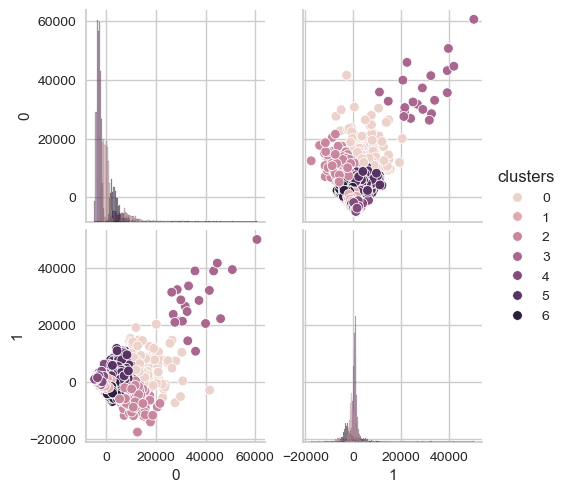

In [39]:
plt.figure(figsize=(8,8))
ax=sns.pairplot(data=pca_df_kmeans,hue="clusters", diag_kind='hist')
plt.show()

### 2. Silhouette Analysi

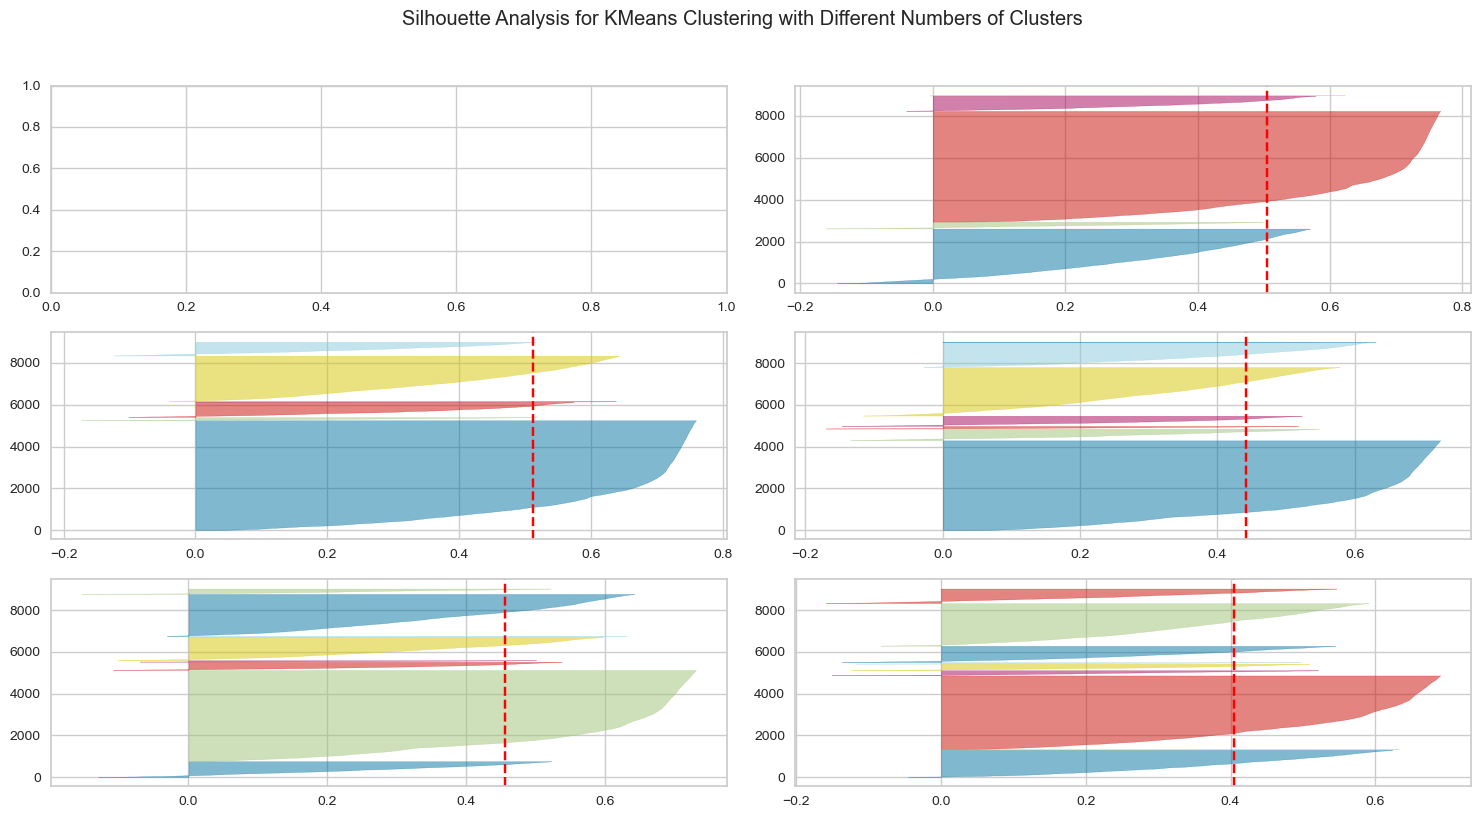

In [41]:
# Calculate silhouette scores for above implementation
silhouette_values_sklearn = silhouette_samples(pca_data, pca_df_kmeans['clusters'])
average_silhouette_sklearn = silhouette_score(pca_data, pca_df_kmeans['clusters'])

fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [5, 6, 7, 8, 9]:

    #Create KMeans instance for different number of clusters
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)

    # Create SilhouetteVisualizer instance with KMeans instance and fit the visualizer
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-2][mod])
    visualizer.fit(pca_data)

plt.suptitle("Silhouette Analysis for KMeans Clustering with Different Numbers of Clusters", y=1.02)
plt.tight_layout()
plt.show()

### 3. Countplot

<Axes: xlabel='clusters', ylabel='count'>

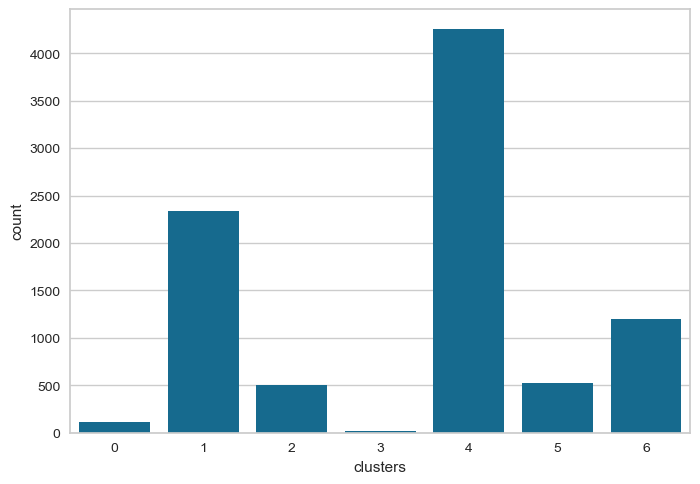

In [43]:
#Visualization
sns.countplot(x=pca_df_kmeans['clusters'])

### 4. Voronoi diagram

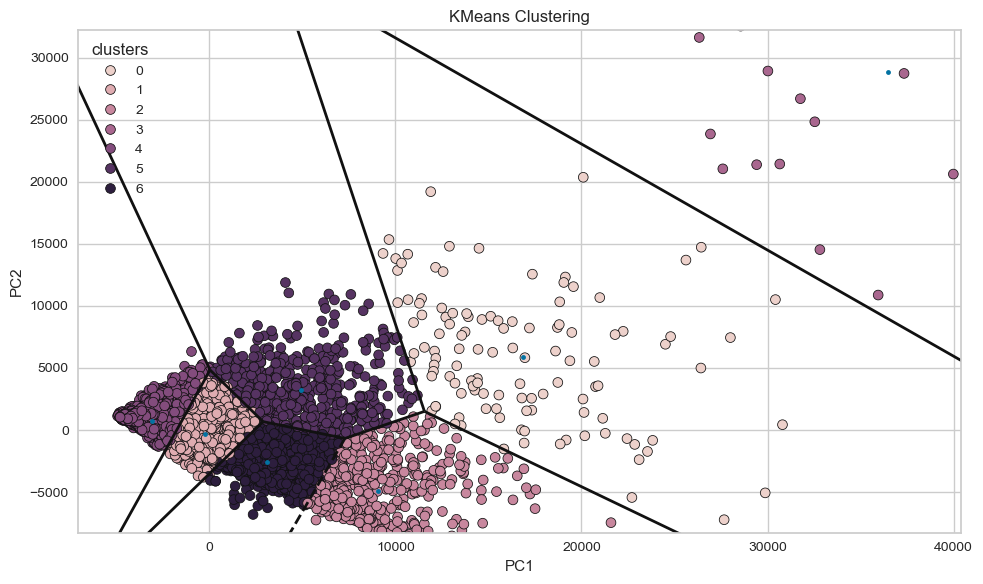

In [45]:
centroids = KMeansModel.cluster_centers_

# Create Voronoi plot
fig, ax = plt.subplots(figsize=(10, 6))
vor = Voronoi(centroids)
voronoi_plot_2d(vor, ax=ax, line_width=2, show_vertices=False)

# Scatter plot using seaborn
sns.scatterplot(x=pca_df_kmeans[pca_df_kmeans.columns[0]], y=pca_df_kmeans[pca_df_kmeans.columns[1]], hue=pca_df_kmeans['clusters'],edgecolor='k', ax=ax)

# Set title and labels
ax.set_title('KMeans Clustering')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

plt.tight_layout()
plt.show()


### 5. Decision Tree Classification Algorithm

In [47]:
#Labelling the original data

labelled_df = pd.concat([df,pd.DataFrame({'Cluster':KMeansModel.labels_})],axis=1)
labelled_df.head(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6


In [48]:
X = labelled_df.drop(['Cluster'],axis = 1 )
y = labelled_df[['Cluster']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state = 101)

In [49]:
#Training our algorithm
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_test)

In [50]:
#Checking our prediction accuracy score
print(confusion_matrix(y_test, clf_prediction))
print(classification_report(y_test, clf_prediction))

[[  25    0    0    1    0    5    1]
 [   0  654    0    0   33    4   28]
 [   2    0  121    0    0    7   15]
 [   0    0    0    6    0    0    0]
 [   0   20    0    0 1234    0    0]
 [   4   17    6    0    1  112    8]
 [   0   18   17    0    0   10  336]]
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.92      0.91      0.92       719
           2       0.84      0.83      0.84       145
           3       0.86      1.00      0.92         6
           4       0.97      0.98      0.98      1254
           5       0.81      0.76      0.78       148
           6       0.87      0.88      0.87       381

    accuracy                           0.93      2685
   macro avg       0.87      0.88      0.87      2685
weighted avg       0.93      0.93      0.93      2685



# Saving the kmeans clustering model and the data with cluster label

In [52]:
#Saving Scikitlearn models
joblib.dump(KMeansModel, "kmeans_model.pkl")

['kmeans_model.pkl']